<a href="https://colab.research.google.com/github/dunkdumb/Virtual-try-on/blob/main/viton_tryon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kornia

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 94.3 MB/s eta 0:00:00


In [ ]:
# Cell 1: Imports and Setup
import os
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from importlib.machinery import SourceFileLoader
import argparse
from types import SimpleNamespace

In [ ]:
import sys
import os
from importlib.machinery import SourceFileLoader

# ----------------- VERIFICATION -----------------

# 1. Define the project path
project_path = '/content/drive/MyDrive/AI Libraries/viton-notebook/VITON-HD'
print(f"Project path set to: {project_path}")

# 2. Check if the critical files exist at that path
test_file_path = os.path.join(project_path, "test.py")
datasets_file_path = os.path.join(project_path, "datasets.py")

if not os.path.exists(test_file_path):
    print(f"ERROR: 'test.py' NOT FOUND at {test_file_path}")
if not os.path.exists(datasets_file_path):
    print(f"ERROR: 'datasets.py' NOT FOUND at {datasets_file_path}")
else:
    # Check if datasets.py is empty
    if os.path.getsize(datasets_file_path) < 100:
        print("ERROR: Your 'datasets.py' file seems to be empty or incomplete!")
        print("Please ensure you have copied the full content for VITONDataset into it.")

print("File checks complete.")

# ----------------- PATH MODIFICATION -----------------

# 3. Add the project directory to the Python path
#    This forces Python to look for 'datasets.py' in your folder first.
if project_path not in sys.path:
  sys.path.insert(0, project_path)
  print("\nProject path successfully added to sys.path.")
else:
  print("\nProject path was already in sys.path.")

# 4. Show the new sys.path to confirm the change
print("\nCurrent Python search paths (sys.path):")
print(sys.path)
print("\n---> Your project path should be the VERY FIRST item in the list above.\n")


# ----------------- EXECUTION -----------------

# 5. Now, load the module. This should finally work.
print("Attempting to load the 'test.py' module...")
try:
    test_module = SourceFileLoader("test", test_file_path).load_module()
    print("Module 'test' loaded successfully!")

    # Get the functions and options
    run_pipeline = test_module.run_full_pipeline
    opt = test_module.get_opt_namespace()

    # Set the absolute paths for your data
    opt.dataset_dir = os.path.join(project_path, 'datasets/')
    opt.checkpoint_dir = os.path.join(project_path, 'checkpoints/')
    opt.save_dir = os.path.join(project_path, 'results/')

    print("\nOptions configured. Ready to run pipeline.")
    # To run the pipeline, uncomment the line below after verifying everything works.
    # run_pipeline(opt)

except ImportError as e:
    print("\n--- IMPORT ERROR OCCURRED ---")
    print(f"ERROR: {e}")
    print("This means Python is still not finding your local files correctly.")
    print("Please double-check your 'project_path' and ensure you restarted the runtime.")
except Exception as e:
    print(f"\n--- AN UNEXPECTED ERROR OCCURRED ---")
    print(f"ERROR: {e}")

Project path set to: /content/drive/MyDrive/AI Libraries/viton-notebook/VITON-HD
File checks complete.

Project path successfully added to sys.path.

Current Python search paths (sys.path):
['/content/drive/MyDrive/AI Libraries/viton-notebook/VITON-HD', '/content', '/env/python', '/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/usr/local/lib/python3.12/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.12/dist-packages/IPython/extensions', '/root/.ipython', '/tmp/tmpzhyiqyby']

---> Your project path should be the VERY FIRST item in the list above.

Attempting to load the 'test.py' module...
Module 'test' loaded successfully!

Options configured. Ready to run pipeline.


In [ ]:
# --- CELL 1 (Local Storage Only) ---

import sys
import os
from importlib.machinery import SourceFileLoader
import shutil

# --- Setup Paths ---
project_path = '/content/drive/MyDrive/AI Libraries/viton-notebook/VITON-HD'
local_results_dir = '/content/results'

# --- Load the Module and Options ---
if project_path not in sys.path:
  sys.path.insert(0, project_path)
test_module = SourceFileLoader("test", os.path.join(project_path, "test.py")).load_module()
run_pipeline = test_module.run_full_pipeline
opt = test_module.get_opt_namespace()

# --- Prepare Local Directories ---
if os.path.exists(local_results_dir):
    shutil.rmtree(local_results_dir)
output_subdirectory = os.path.join(local_results_dir, opt.name)
os.makedirs(output_subdirectory)
print(f"Created local directory for results: {output_subdirectory}")

# --- Configure Paths for the Pipeline ---
opt.dataset_dir = os.path.join(project_path, 'datasets/')
opt.checkpoint_dir = os.path.join(project_path, 'checkpoints/')
opt.save_dir = local_results_dir # Save to the local base directory

# --- Run the Pipeline ---
print("\nStarting the full try-on pipeline...")
run_pipeline(opt)

print(f"\nPipeline finished! Your temporary results are available in: {output_subdirectory}")
print("You can now run the visualization cells.")

Created local directory for results: /content/results/tryon_test

Starting the full try-on pipeline...
Network [SegGenerator] was created. Total number of parameters: 34.5 million. To see the architecture, do print(network).
Network [ALIASGenerator] was created. Total number of parameters: 100.5 million. To see the architecture, do print(network).
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6

Pipeline finished! Your temporary results are available in: /content/results/tryon_test
You can now run the visualization cells.


In [ ]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt

def show_input_vs_output(input_img_path, output_img_path):
    input_img = PILImage.open(input_img_path).convert("RGB")
    output_img = PILImage.open(output_img_path).convert("RGB")

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(input_img)
    plt.title("Input Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(output_img)
    plt.title("Try-On Result")
    plt.axis("off")

    plt.show()

Looking for outputs in: /content/results/tryon_test
Found 6 output files.
Showing result: /content/results/tryon_test/00891_01430_00.jpg


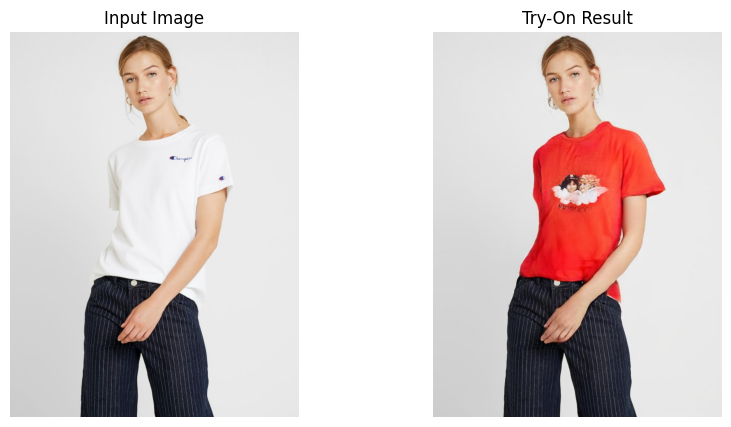

Showing result: /content/results/tryon_test/03615_09933_00.jpg


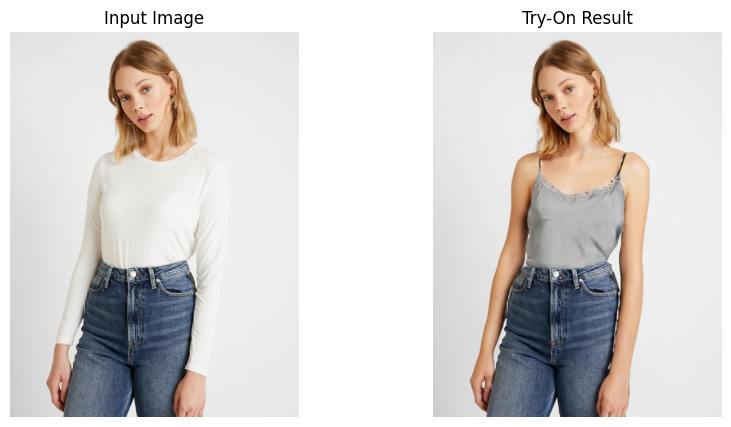

Showing result: /content/results/tryon_test/07445_06429_00.jpg


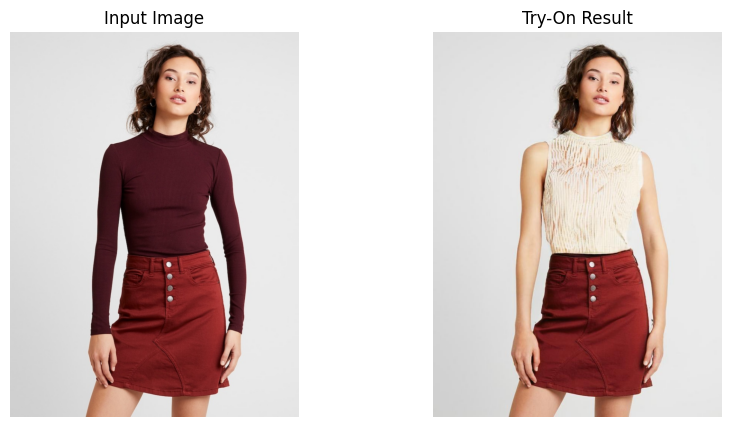

Showing result: /content/results/tryon_test/07573_11791_00.jpg


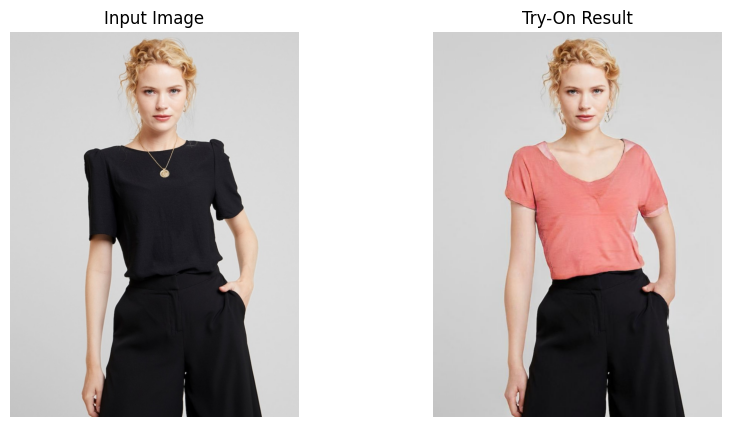

Showing result: /content/results/tryon_test/08909_02783_00.jpg


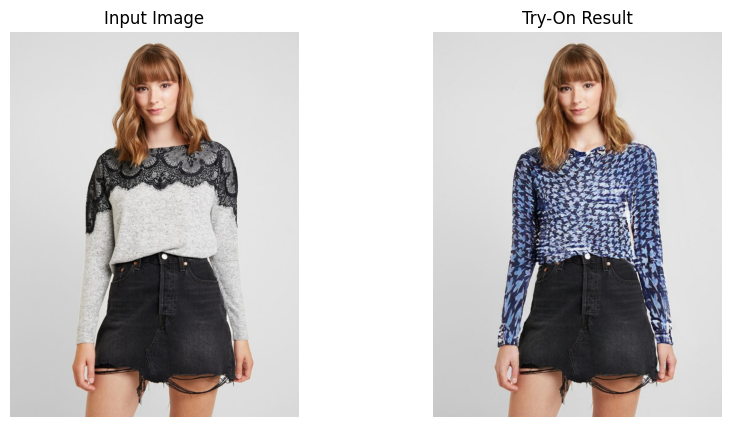

Showing result: /content/results/tryon_test/10549_01260_00.jpg


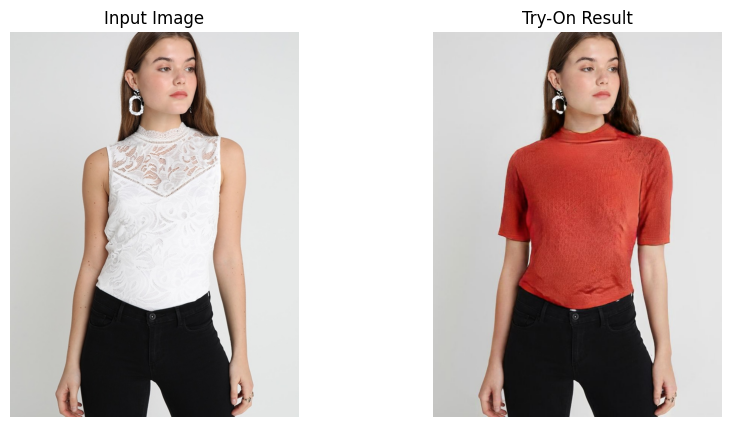

In [ ]:
# --- CELL 3 (Updated for Local Storage) ---
import glob
import os

# *** CHANGE: Look for results in the local Colab folder ***
output_folder = os.path.join('/content/results', opt.name)
print(f"Looking for outputs in: {output_folder}")

# Load output images
output_files = sorted(glob.glob(os.path.join(output_folder, '*.jpg')))
print(f"Found {len(output_files)} output files.")

# Display all try-on results
if not output_files:
    print("No output images found.")
else:
    for out_path in output_files:
        print(f"Showing result: {out_path}")
        # Extract image ID to find original input (still on Google Drive)
        image_id = os.path.basename(out_path).split('_')[0]
        input_img_path = os.path.join(project_path, 'datasets', 'test', 'image', f'{image_id}_0.jpg')

        if os.path.exists(input_img_path):
             show_input_vs_output(input_img_path, out_path)
        else:
             # Fallback for different naming conventions
             input_img_path = os.path.join(project_path, 'datasets', 'test', 'image', f'{image_id}_00.jpg')
             if os.path.exists(input_img_path):
                 show_input_vs_output(input_img_path, out_path)
             else:
                 print(f"Could not find matching input image for {out_path}")

#OWN IMAGES!!!!

Installing rembg and onnxruntime...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.3 MB/s eta 0:00:00



--- Processing Image ---
Input: /content/00105_00.jpg


100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 257GB/s]



✅ SUCCESS! Files saved to the temporary Colab runtime.
-> Cloth Image: /content/generated_clothes/cloth/00105_00.jpg
-> Cloth Mask: /content/generated_clothes/cloth-mask/00105_00_mask.jpg

WHAT TO DO NEXT:
1. In the file browser on the left, navigate to the '/content/generated_clothes/' folder.
2. Move the cloth image to your Google Drive: .../datasets/test/cloth/
3. Move the mask image to your Google Drive: .../datasets/test/cloth-mask/


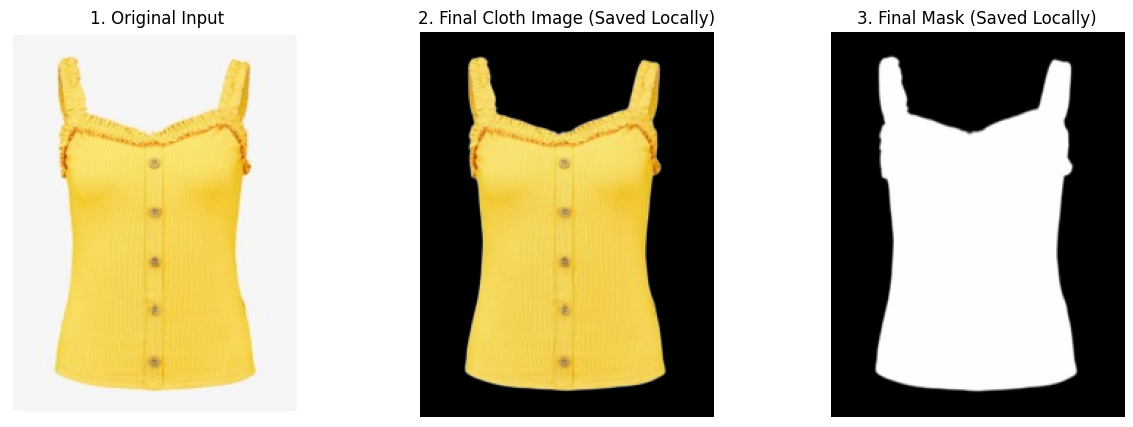

In [ ]:
# --- Automatic Clothing Mask Generation (Saves Locally) ---

# 1. Install 'rembg' AND its required dependency 'onnxruntime'
print("Installing rembg and onnxruntime...")
!pip install -q rembg onnxruntime

# 2. Import necessary libraries
import os
from PIL import Image
import rembg
import matplotlib.pyplot as plt

# --- CONFIGURATION: SET YOUR FILE PATHS HERE ---

# The name of your raw clothing image that you have uploaded
# IMPORTANT: First, upload your image to the /content/ folder using the file browser on the left
input_image_name = "00105_00.jpg" # <--- CHANGE THIS to your image name

# Define the final names for the model's input files
output_cloth_name = "00105_00.jpg"
output_mask_name = "00105_00_mask.jpg"

# --- DO NOT EDIT BELOW THIS LINE ---

# Create a dedicated folder in the Colab runtime to store the outputs
local_output_dir = "/content/generated_clothes/"
local_cloth_dir = os.path.join(local_output_dir, "cloth")
local_mask_dir = os.path.join(local_output_dir, "cloth-mask")
os.makedirs(local_cloth_dir, exist_ok=True)
os.makedirs(local_mask_dir, exist_ok=True)

# Construct the full local paths
input_image_path = os.path.join("/content/", input_image_name)
final_cloth_path = os.path.join(local_cloth_dir, output_cloth_name)
final_mask_path = os.path.join(local_mask_dir, output_mask_name)

print("\n--- Processing Image ---")
print(f"Input: {input_image_path}")

# 3. Load the image and remove the background
try:
    input_image = Image.open(input_image_path)
    output_image_with_alpha = rembg.remove(input_image)

    # 4. Create the black-and-white mask from the alpha channel
    alpha_mask = output_image_with_alpha.getchannel('A')
    bw_mask = alpha_mask.convert('L')

    # 5. Create the final cloth image on a black background
    black_background = Image.new("RGB", output_image_with_alpha.size, (0, 0, 0))
    black_background.paste(output_image_with_alpha, (0, 0), output_image_with_alpha)

    # 6. Save the two required files to the local Colab session
    black_background.save(final_cloth_path)
    bw_mask.save(final_mask_path)

    print(f"\n✅ SUCCESS! Files saved to the temporary Colab runtime.")
    print(f"-> Cloth Image: {final_cloth_path}")
    print(f"-> Cloth Mask: {final_mask_path}")

    print("\nWHAT TO DO NEXT:")
    print("1. In the file browser on the left, navigate to the '/content/generated_clothes/' folder.")
    print("2. Move the cloth image to your Google Drive: .../datasets/test/cloth/")
    print("3. Move the mask image to your Google Drive: .../datasets/test/cloth-mask/")


    # 7. Display the results for verification
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(input_image)
    plt.title("1. Original Input")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(black_background)
    plt.title("2. Final Cloth Image (Saved Locally)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(bw_mask, cmap='gray')
    plt.title("3. Final Mask (Saved Locally)")
    plt.axis("off")

    plt.show()

except FileNotFoundError:
    print(f"\nERROR: File not found at '{input_image_path}'.")
    print("Please make sure you have uploaded your image to '/content/' and set 'input_image_name' correctly.")
except Exception as e:
    print(f"\nAn error occurred: {e}")